<a href="https://colab.research.google.com/github/MorrisSimons/SCH_Visualizing_Swedens_Learning_Landscape/blob/main/Lab_on_highest_level_of_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Isak Rulander
Morris Simons
Billy Bergström

Introduction
In this project 3 students analyse a dataset consisting of people in Sweden between the ages 25 to 65 and their educationonal level. The data reache from 1990 to 2021, it also separates poeple born in Sweden and Outside of Sweden. In this analyse we begin with three questions and the following hypothesis. 


Hypothesis  1, Question 1, Has foreign-born contributed with an lower growth of an high level of education compared to domestic-born people since 2000

Hypothesis  2, People studying in collage (less than 3 years counts )has increased more than 30%

Hypothesis  3, People how only have a primary education has dropped over 30% since 1990

... 

(strategy plan)

* conclusion

* discussion of the results, summary

* significance test typ?

* final conclusion providing final answer

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML


In [4]:
my_df = pd.read_excel('Morris.xlsx', sheet_name='Sheet1')
inrikes = pd.read_excel('Morris.xlsx', sheet_name='inrikes')
utrikes = pd.read_excel('Morris.xlsx', sheet_name='utrikes')

# total population
year = my_df.År
befolkning = my_df.Befolkning
kön = my_df.Kön
föregym = my_df.Förgymnasialkortare9år
grundskola9 = my_df.Förgymnasial9år
less_than_three_years_highschool = my_df.Gymnasialkortare3år
three_years_highschool = my_df.Gymnasialutb3år
college_less_3years = my_df.Eftergymnasialkortareän3år
collage_more_3years = my_df.Eftergymnasialutb3årellerlängre
forskarutbildning = my_df.Forskarutbildning
saknas = my_df.Uppgiftomutbildningsaknas

# inrikes
inrikes_year = inrikes.År
inrikes_befolkning = inrikes.Befolkning
inrikes_kön = inrikes.Kön
inrikes_föregym = inrikes.Förgymnasialkortare9år
inrikes_grundskola9 = inrikes.Förgymnasial9år
inrikes_less_than_three_years_highschool = inrikes.Gymnasialkortare3år
inrikes_three_years_highschool = inrikes.Gymnasialutb3år
inrikes_college_less_3years = inrikes.Eftergymnasialkortareän3år
inrikes_collage_more_3years = inrikes.Eftergymnasialutb3årellerlängre
inrikes_Forskarutbildning = inrikes.Forskarutbildning
inrikes_saknas = inrikes.Uppgiftomutbildningsaknas

# utrikes
utrikes_year = utrikes.År
utrikes_befolkning = utrikes.Befolkning
utrikes_kön = utrikes.Kön
utrikes_föregym = utrikes.Förgymnasialkortare9år
utrikes_grundskola9 = utrikes.Förgymnasial9år
utrikes_less_than_three_years_highSchool = utrikes.Gymnasialkortare3år
utrikes_three_years_highSchool = utrikes.Gymnasialutb3år
utrikes_college_less_3years = utrikes.Eftergymnasialkortareän3år
utrikes_collage_more_3years = utrikes.Eftergymnasialutb3årellerlängre
utrikes_forskarutbildning = utrikes.Forskarutbildning
utrikes_saknas = utrikes.Uppgiftomutbildningsaknas


In [5]:
women = pd.read_excel('isak_clean.xlsx', sheet_name='kvinna')
men = pd.read_excel('isak_clean.xlsx', sheet_name='man')

women_women_year = women.Year
women_gender = women.Gender
women_befolkning = women.Befolkning
women_Föregym = women.Forgymnasialkortare9ar
women_grundskola9 = women.Forgymnasial9ar
women_less_than_three_years_highSchool = women.Gymnasialkortare3ar
women_three_years_highSchool = women.Gymnasialutb3ar
women_College_less_3years = women.Eftergymnasialkortarean3ar
women_collage_more_3years = women.Eftergymnasialutb3arellerlangre
women_Forskarutbildning = women.Forskarutbildning
women_saknas = women.Uppgiftomutbildningsaknas

men_year = men.Year
men_gender = men.Gender
men_befolkning = men.Befolkning
men_Föregym = men.Forgymnasialkortare9ar
men_grundskola9 = men.Forgymnasial9ar
men_less_than_three_years_highSchool = men.Gymnasialkortare3ar
men_three_years_highSchool = men.Gymnasialutb3ar
men_College_less_3years = men.Eftergymnasialkortarean3ar
men_collage_more_3years = men.Eftergymnasialutb3arellerlangre
men_Forskarutbildning = men.Forskarutbildning
men_saknas = men.Uppgiftomutbildningsaknas

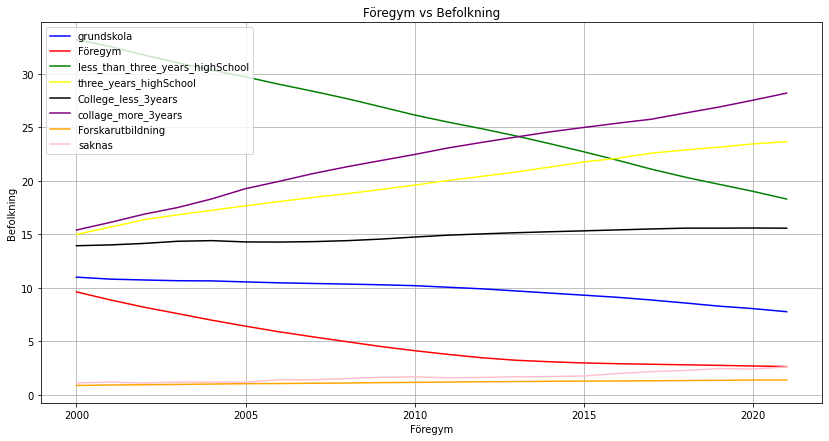

In [6]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()

ax.plot(year, grundskola9,label="grundskola", color="blue")
ax.plot(year, föregym,label="Föregym", color="red")
ax.plot(year, less_than_three_years_highschool, label="less_than_three_years_highSchool", color="green")
ax.plot(year, three_years_highschool,label="three_years_highSchool", color="yellow")
ax.plot(year, college_less_3years,label="College_less_3years", color="black")
ax.plot(year, collage_more_3years,label="collage_more_3years", color="purple")
ax.plot(year, forskarutbildning,label="Forskarutbildning", color="orange")
ax.plot(year, saknas,label="saknas", color="pink")

ax.set_xlabel("Föregym")
ax.set_ylabel("Befolkning")
ax.grid()
ax.set_title("Föregym vs Befolkning")
ax.legend()

In [7]:
my_labels = 'Less than 9 years primary', '9 Years primary school', 'three years high school', 'less than three years high school', 'College less 3years', 'Collage more 3years', 'Forskarutbildning'

def Function(x):
    y = x + 10
    list_of_values_total = [föregym[y], grundskola9[y], three_years_highschool[y], less_than_three_years_highschool[y], college_less_3years[y], collage_more_3years[y], forskarutbildning[y]]
    list_of_values_inrikes = [inrikes_föregym[x], inrikes_grundskola9[x], inrikes_three_years_highschool[x], inrikes_less_than_three_years_highschool[x], inrikes_college_less_3years[x],inrikes_Forskarutbildning[x], inrikes_collage_more_3years[x]]
    list_of_values_utrikes = [utrikes_föregym[x], utrikes_grundskola9[x], utrikes_three_years_highSchool[x], utrikes_less_than_three_years_highSchool[x], utrikes_college_less_3years[x], utrikes_collage_more_3years[x], utrikes_forskarutbildning[x]]
    fig, axes = plt.subplots(3, 1, figsize=(14,7))
    plt.suptitle(f"Education in Sweden year {utrikes_year[x]}", fontsize=14)
    fig.tight_layout()
    for ax, df, title in zip(axes.flatten(), [list_of_values_inrikes, list_of_values_utrikes, list_of_values_total], ["inrikes", "utrikes", "total"]):
        ax.pie(df, labels=my_labels, autopct='%1.1f%%',)
        ax.set_title(title)

interact (Function, x=(0,21,1));

interactive(children=(IntSlider(value=10, description='x', max=21), Output()), _dom_classes=('widget-interact'…

high is measured by PHD + collage more 3years + College less 3years
low is measured by primary school less than 9year + 9year primary school + less than three years highSchool + three years highSchool


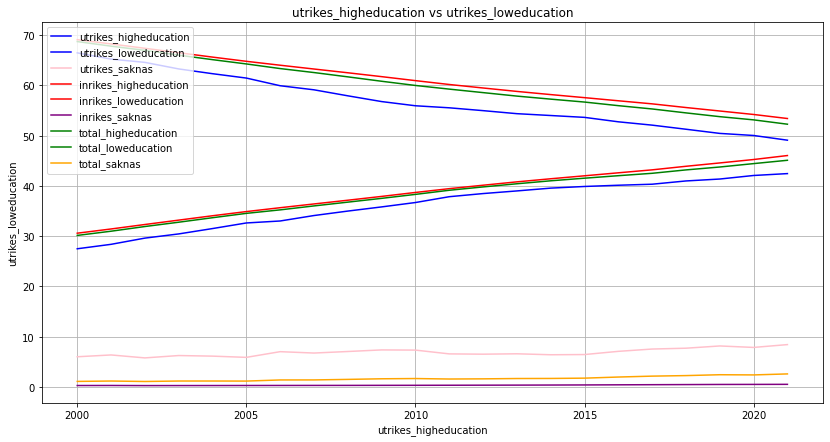

In [8]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot()

utrikes_higheducation = utrikes_forskarutbildning + utrikes_collage_more_3years + utrikes_college_less_3years
utrikes_loweducation = utrikes_grundskola9 + utrikes_föregym + utrikes_less_than_three_years_highSchool + utrikes_three_years_highSchool
utrikes_saknas


inrikes_higheducation = inrikes_Forskarutbildning + inrikes_collage_more_3years + inrikes_college_less_3years
inrikes_loweducation = inrikes_grundskola9 + inrikes_föregym + inrikes_less_than_three_years_highschool + inrikes_three_years_highschool
inrikes_saknas

total_higheducation = forskarutbildning + collage_more_3years + college_less_3years
total_loweducation = grundskola9 + föregym + less_than_three_years_highschool + three_years_highschool
total_saknas = saknas


ax.plot(utrikes_year, utrikes_higheducation,label="utrikes_higheducation", color="blue")
ax.plot(utrikes_year, utrikes_loweducation,label="utrikes_loweducation", color="blue")
ax.plot(utrikes_year,utrikes_saknas, label="utrikes_saknas", color="pink")


ax.plot(utrikes_year, inrikes_higheducation,label="inrikes_higheducation", color="red")
ax.plot(utrikes_year, inrikes_loweducation,label="inrikes_loweducation", color="red")
ax.plot(utrikes_year,inrikes_saknas, label="inrikes_saknas", color="purple")

ax.plot(year, total_higheducation,label="total_higheducation", color="green")
ax.plot(year, total_loweducation,label="total_loweducation", color="green")
ax.plot(year,total_saknas, label="total_saknas", color="orange")


ax.set_xlabel("utrikes_higheducation")
ax.set_ylabel("utrikes_loweducation")
ax.grid()
ax.set_title("utrikes_higheducation vs utrikes_loweducation")
ax.legend()

print("high is measured by PHD + collage more 3years + College less 3years")
print("low is measured by primary school less than 9year + 9year primary school + less than three years highSchool + three years highSchool")

high is measured by PHD + collage more 3years + College less 3years
low is measured by primary school less than 9year + 9year primary school + less than three years highSchool + three years highSchool


<Figure size 1008x504 with 0 Axes>

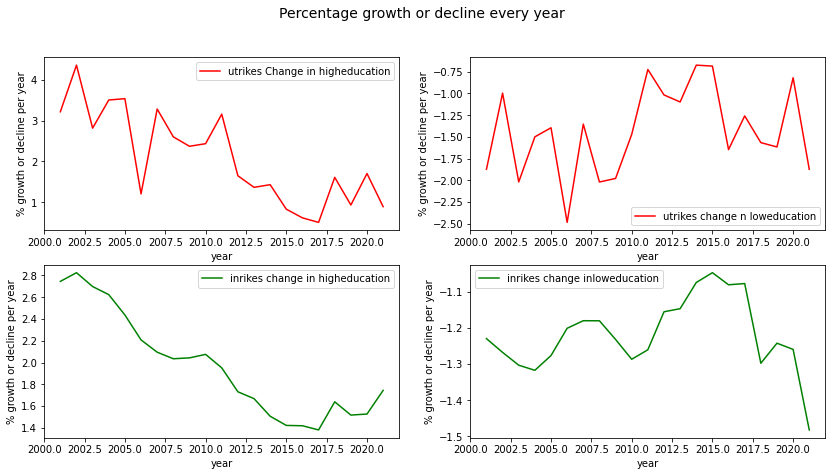

In [9]:
utrikes_growth_in_higheducation = []
utrikes_growth_in_loweducation = []
inrikes_growth_in_higheducation = []
inrikes_growth_in_loweducation = []

for i in range(0,21):
    utrikes_growth_in_higheducation.append((utrikes_higheducation[i+1] - utrikes_higheducation[i])/utrikes_higheducation[i]*100)
    utrikes_growth_in_loweducation.append((utrikes_loweducation[i+1] - utrikes_loweducation[i])/utrikes_loweducation[i]*100)
    inrikes_growth_in_higheducation.append((inrikes_higheducation[i+1] - inrikes_higheducation[i])/inrikes_higheducation[i]*100)
    inrikes_growth_in_loweducation.append((inrikes_loweducation[i+1] - inrikes_loweducation[i])/inrikes_loweducation[i]*100)

fig = plt.figure(figsize=(14,7));
fig, axes = plt.subplots(2, 2, figsize=(14,7))
plt.suptitle(f"Percentage growth or decline every year", fontsize=14)
for ax, df,title, color in zip(axes.flatten(), [utrikes_growth_in_higheducation, utrikes_growth_in_loweducation, inrikes_growth_in_higheducation, inrikes_growth_in_loweducation], ["utrikes Change in higheducation", "utrikes change n loweducation", "inrikes change in higheducation", "inrikes change inloweducation"], ["red", "red", "green", "green"]):
    ax.plot(utrikes_year[1:], df, label=title, color=color)
    ax.set_ylabel("% growth or decline per year")
    ax.set_xlabel("year")
    ax.legend()


print("high is measured by PHD + collage more 3years + College less 3years")
print("low is measured by primary school less than 9year + 9year primary school + less than three years highSchool + three years highSchool")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

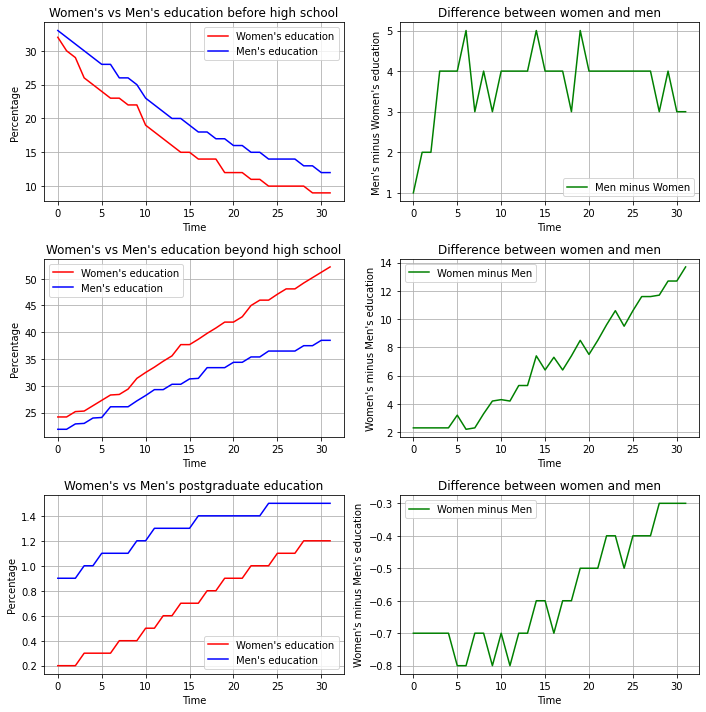

In [11]:
men_high_education = men_College_less_3years + men_collage_more_3years + men_Forskarutbildning
women_high_education = women_College_less_3years + women_collage_more_3years + women_Forskarutbildning
dif_high_education = women_high_education - men_high_education

men_postgraduate_education = men_Forskarutbildning
women_postgraduate_education = women_Forskarutbildning
dif_postgraduate_education = women_postgraduate_education - men_postgraduate_education

men_low_education = men_Föregym + men_grundskola9
women_low_education = women_Föregym + women_grundskola9
dif_low_education = men_low_education - women_low_education

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))


#Ploting of people not studying after higschool

ax1.plot(women_low_education, label="Women's education", color="red")
ax1.plot(men_low_education, label="Men's education", color="blue")
ax1.set_xlabel("Time")
ax1.set_ylabel("Percentage")
ax1.grid()
ax1.set_title("Women's vs Men's education before high school")
ax1.legend()

ax2.plot(dif_low_education, label="Men minus Women", color="green")
ax2.set_xlabel("Time")
ax2.set_ylabel("Men's minus Women's education")
ax2.grid()
ax2.set_title("Difference between women and men")
ax2.legend()

#Ploting of people studying after higschool

ax3.plot(women_high_education, label="Women's education", color="red")
ax3.plot(men_high_education, label="Men's education", color="blue")
ax3.set_xlabel("Time")
ax3.set_ylabel("Percentage")
ax3.grid()
ax3.set_title("Women's vs Men's education beyond high school")
ax3.legend()

ax4.plot(dif_high_education, label="Women minus Men", color="green")
ax4.set_xlabel("Time")
ax4.set_ylabel("Women's minus Men's education")
ax4.grid()
ax4.set_title("Difference between women and men")
ax4.legend()

#Ploting of people studying postgraduate education

ax5.plot(women_postgraduate_education, label="Women's education", color="red")
ax5.plot(men_postgraduate_education, label="Men's education", color="blue")
ax5.set_xlabel("Time")
ax5.set_ylabel("Percentage")
ax5.grid()
ax5.set_title("Women's vs Men's postgraduate education")
ax5.legend()

ax6.plot(dif_postgraduate_education, label="Women minus Men", color="green")
ax6.set_xlabel("Time")
ax6.set_ylabel("Women's minus Men's education")
ax6.grid()
ax6.set_title("Difference between women and men")
ax6.legend()

plt.tight_layout()
plt.show()


In [12]:
def Function(y):
    x = y - 1990

    names = ['Less_than_elementary', 'Elementary', 'Highschool_less_3years','HighSchool_more_3years',
    'College_less_3years','Collage_more_3years', 'Postgraduate_education']

    women = [women_Föregym[x], women_grundskola9[x], women_less_than_three_years_highSchool[x],
    women_three_years_highSchool[x], women_College_less_3years[x], women_collage_more_3years[x],women_Forskarutbildning[x]]

    men = [men_Föregym[x], men_grundskola9[x], men_less_than_three_years_highSchool[x],
    men_three_years_highSchool[x], men_College_less_3years[x], men_collage_more_3years[x], men_Forskarutbildning[x]]

    data_len = np.arange(len(names))
    width = 0.4

    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot()

    ax.bar(data_len - width/2, women, width, label='Women', color='red')
    ax.bar(data_len + width/2, men, width, label='Men', color='blue')
    ax.set_xticks(data_len, names)
    plt.xticks(rotation=45, ha="right")
    ax.set_ylabel('Percentage')
    ax.set_ylim([0, 40])
    ax.grid()
    ax.legend()
    
    plt.show()


interact(Function, y=(1990,2021,1));

interactive(children=(IntSlider(value=2005, description='y', max=2021, min=1990), Output()), _dom_classes=('wi…